<a href="https://colab.research.google.com/github/thuthaont/thuthaont.github.io/blob/main/KPMG_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <center> <span style="color: darkblue; font-size: 1.5em;"> KPMG Data Analytics Virtual Internship
## <b> <center> <span style="color: darkblue; font-size: 1.2em;"> Task 2: Data Insights

## <b> <span style="color: darkblue; font-size: 1.0em;"> Contents
- Data Exploration
- Model Development
- Interpretation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, f1_score,
                             precision_recall_curve, precision_score,
                             recall_score, roc_auc_score, roc_curve, RocCurveDisplay)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     StratifiedShuffleSplit, cross_val_predict,
                                     cross_val_score, learning_curve,
                                     train_test_split)
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', 50)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df2 = pd.read_excel('KPMG_task1.xlsx', sheet_name = [0,1,2,3])
Transactions = df2[0]
NewCustomerList = df2[1]
CustomerDemographic = df2[2]
CustomerAddress = df2[3]

### 1. Data Exploration 

#### 1.1. Gender distributions

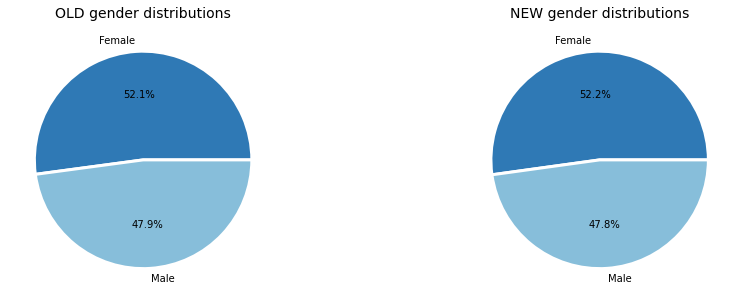

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
palette_color = sns.color_palette('RdBu_r')
ax[0].pie(CustomerDemographic['gender'].value_counts(), 
          labels=CustomerDemographic['gender'].value_counts().index, colors=palette_color,
          autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax[0].set_title('OLD gender distributions', fontsize = 14)

ax[1].pie(NewCustomerList['gender'].value_counts(), 
          labels=NewCustomerList['gender'].value_counts().index, colors=palette_color,
          autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax[1].set_title('NEW gender distributions', fontsize = 14)
plt.show()

- The graphs illustrate the proportion of male and female customers in old and new datasets. 
- Specifically, in both existing and new 1000 customers data, about half of the customers are male while the other half are female.
- The number of females is slightly higher than that of males.

#### 1.2 Age distributions

In [ ]:
#create "age" column
CustomerDemographic['age'] =  2022 - CustomerDemographic['DOB'].dt.year
CustomerDemographic.drop(['DOB'], inplace = True, axis = 1)
NewCustomerList['age'] =  2022 - NewCustomerList['DOB'].dt.year
NewCustomerList.drop(['DOB'], inplace = True, axis = 1)

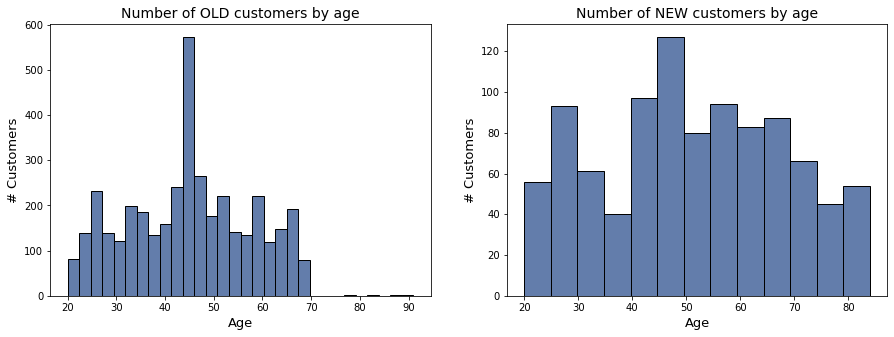

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data = CustomerDemographic['age'], color = '#2f528f', ax = ax[0])
ax[0].set_ylabel('# Customers', fontsize = 13)
ax[0].set_xlabel('Age', fontsize = 13)
ax[0].set_title('Number of OLD customers by age', fontsize = 14)
sns.histplot(data = NewCustomerList['age'], color = '#2f528f', ax = ax[1]) 
ax[1].set_ylabel('# Customers', fontsize = 13)
ax[1].set_xlabel('Age', fontsize = 13)
ax[1].set_title('Number of NEW customers by age', fontsize = 14)
plt.show()

As we can see from both graphs, the highest number of customers is in the age between 40 and 50 years old.

In [ ]:
#create "age_group" column
def ages(x):
    if (20 <= x <= 39) :
        return 'Adults'
    elif (40 <= x <= 59):
        return 'Middle-Aged People'
    elif (60 <= x): 
        return 'The Elderly'
CustomerDemographic['age_group'] = CustomerDemographic['age'].apply(lambda x: ages(x))
NewCustomerList['age_group'] = NewCustomerList['age'].apply(lambda x: ages(x))                                                                    

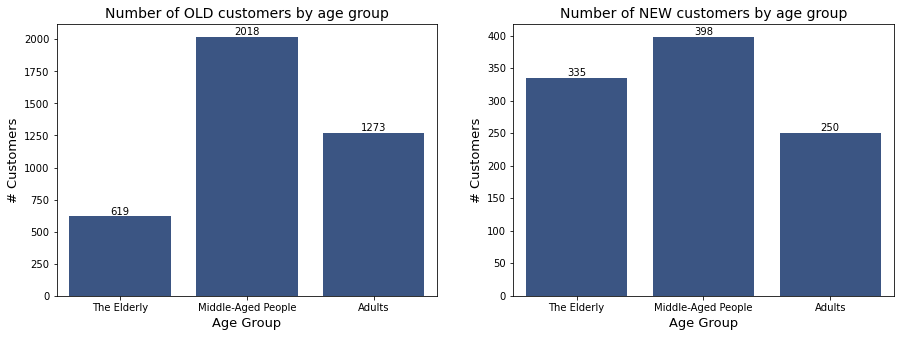

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='age_group', data = CustomerDemographic, color='#2f528f', ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_ylabel('# Customers', fontsize = 13)
ax[0].set_xlabel('Age Group', fontsize = 13)
ax[0].set_title('Number of OLD customers by age group', fontsize = 14)
sns.countplot(x='age_group', data = NewCustomerList, color='#2f528f', ax = ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_ylabel('# Customers', fontsize = 13)
ax[1].set_xlabel('Age Group', fontsize = 13)
ax[1].set_title('Number of NEW customers by age group', fontsize = 14)
plt.show()

- The group of middle-aged people also makes up the highest proportion in 3 age groups.
- However, there is an increase in the number of the elderly in term of percentage in the new dataset.

#### 1.3. Bike related purchases over the last 3 years 

In [ ]:
print('5 products that have highest number of purchases by OLD customers in the last 3 years:'
      , CustomerDemographic['past_3_years_bike_related_purchases'].value_counts().head(5).to_dict())

5 products that have highest number of purchases by OLD customers in the last 3 years: {19: 55, 16: 55, 20: 53, 67: 52, 2: 50}


In [ ]:
print('5 products that have highest number of purchases by NEW customers in the last 3 years:'
      , NewCustomerList['past_3_years_bike_related_purchases'].value_counts().head(5).to_dict())

5 products that have highest number of purchases by NEW customers in the last 3 years: {60: 20, 59: 18, 42: 17, 70: 17, 37: 16}


#### 1.4. Job industry category

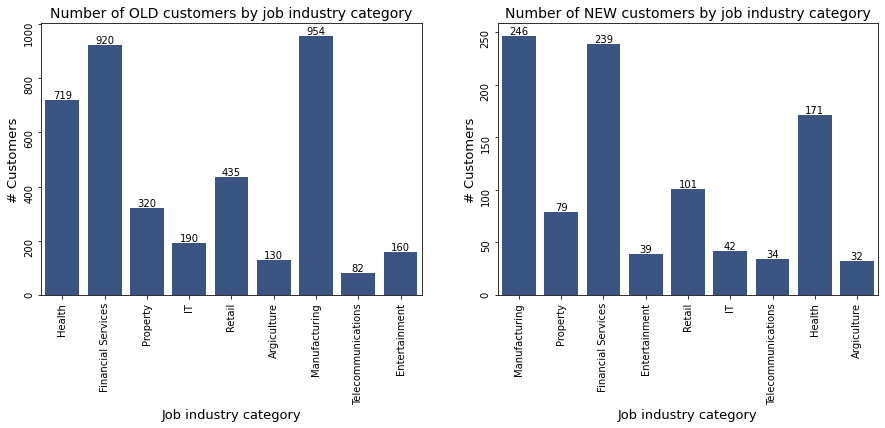

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='job_industry_category', data = CustomerDemographic, color='#2f528f', ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_ylabel('# Customers', fontsize = 13)
ax[0].set_xlabel('Job industry category', fontsize = 13)
ax[0].set_title('Number of OLD customers by job industry category', fontsize = 14)
sns.countplot(x='job_industry_category', data = NewCustomerList, color='#2f528f', ax = ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_ylabel('# Customers', fontsize = 13)
ax[1].set_xlabel('Job industry category', fontsize = 13)
ax[1].set_title('Number of NEW customers by job industry category', fontsize = 14)
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)
plt.show()

- The majority of our customers are working at Manufacturing and Finance industries.
- The order of job industries ranked by number of customers are the same between existing dataset and new one.

#### 1.5. Wealth segments

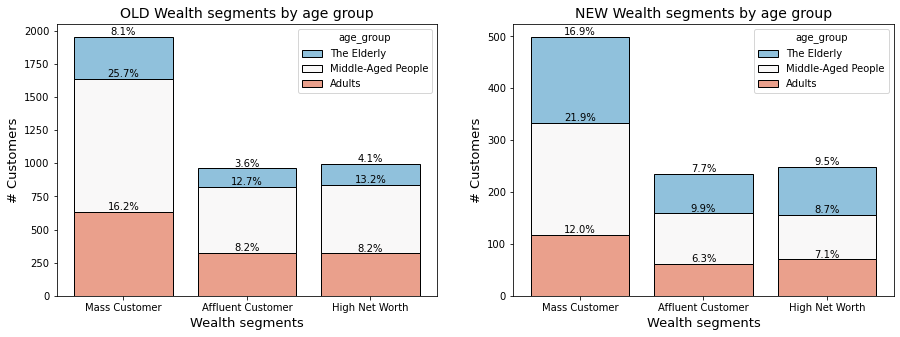

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data = CustomerDemographic, x = 'wealth_segment', hue = 'age_group', discrete=True
             , multiple="stack", palette = 'RdBu_r', shrink=.8, ax = ax[0])
ax[0].set_ylabel('# Customers', fontsize = 13)
ax[0].set_xlabel('Wealth segments', fontsize = 13)
ax[0].set_title('OLD Wealth segments by age group', fontsize = 14)
for c in ax[0].containers:
    labels = [f'{h/CustomerDemographic.age_group.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax[0].bar_label(c, labels=labels, label_type='edge')
sns.histplot(data = NewCustomerList, x = 'wealth_segment', hue = 'age_group', discrete=True
             , multiple="stack", palette = 'RdBu_r', shrink=.8, ax = ax[1])
ax[1].set_ylabel('# Customers', fontsize = 13)
ax[1].set_xlabel('Wealth segments', fontsize = 13)
ax[1].set_title('NEW Wealth segments by age group', fontsize = 14)
for c in ax[1].containers:
    labels = [f'{h/NewCustomerList.age_group.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax[1].bar_label(c, labels=labels, label_type='edge')
plt.show()

- In all age groups, the number of Mass Customers is the highest, so we should focus on this social class.
- Affluent Customer and High Net Worth have quite similar proportions of customers.
- In the new dataset, the percentages of elderly people rise by 2 times in all wealth segments.

#### 1.6. Cars owned on each states

In [ ]:
old_dataset = CustomerDemographic.merge(CustomerAddress, how='left', on='customer_id')

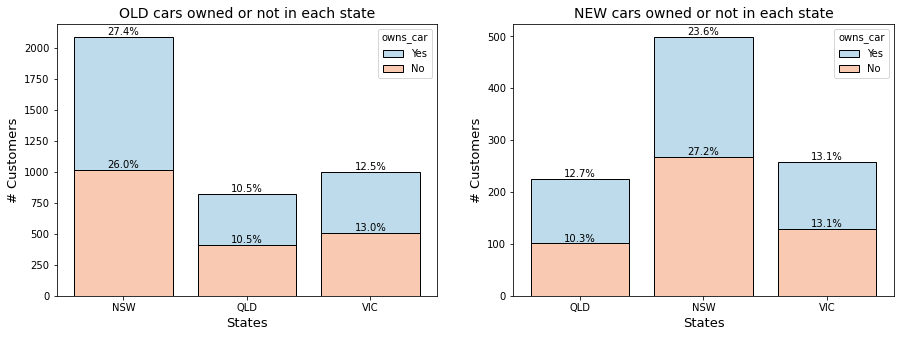

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data = old_dataset, x = 'state', hue = 'owns_car', discrete=True
             , multiple="stack", palette = 'RdBu_r', shrink=.8, ax = ax[0])
ax[0].set_ylabel('# Customers', fontsize = 13)
ax[0].set_xlabel('States', fontsize = 13)
ax[0].set_title('OLD cars owned or not in each state', fontsize = 14)
for c in ax[0].containers:
    labels = [f'{h/old_dataset.owns_car.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax[0].bar_label(c, labels=labels, label_type='edge')
sns.histplot(data = NewCustomerList, x = 'state', hue = 'owns_car', discrete=True
             , multiple="stack", palette = 'RdBu_r', shrink=.8, ax = ax[1])
ax[1].set_ylabel('# Customers', fontsize = 13)
ax[1].set_xlabel('States', fontsize = 13)
ax[1].set_title('NEW cars owned or not in each state', fontsize = 14)
for c in ax[1].containers:
    labels = [f'{h/NewCustomerList.owns_car.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax[1].bar_label(c, labels=labels, label_type='edge')
plt.show()

- The number of customers is highest in New South Wales, followed by Victoria and Queensland respectively.
- It can be seen that about half of the customers have cars, while the other half do not.
- However, there are fewer New South Wales people owning cars in the new 1000 customers dataset than the old one.

#### 1.7. RFM analysis and customer classifications

In [ ]:
#create "profit" column
Transactions['profit'] = Transactions['list_price'] - Transactions['standard_cost']

In [ ]:
#create "recency" column
Transactions['recency'] = Transactions['transaction_date'].apply(lambda x: (Transactions['transaction_date'].max() - x).days)

In [ ]:
#create "rfm" table
aggr = {
    'recency': lambda x: x.min(),  # the number of days since last order (Recency)
    'product_id': lambda x: x.count(), # the total number of products bought in the last period (Frequency)
    'profit': lambda x: x.sum()
}
rfm = Transactions.groupby('customer_id').agg(aggr).reset_index()
rfm.rename(columns={'product_id': 'frequency', 'profit': 'monetary'}, inplace=True)
rfm.head()

,customer_id,recency,frequency,monetary
0,1,7,11,3018.09
1,2,128,3,2226.26
2,3,102,8,3362.81
3,4,195,2,220.57
4,5,16,6,2394.94


In [ ]:
quartiles = rfm[['recency', 'frequency', 'monetary']].quantile([.25, .5, .75]).to_dict()
quartiles

{'recency': {0.25: 17.0, 0.5: 44.0, 0.75: 86.0},
 'frequency': {0.25: 4.0, 0.5: 6.0, 0.75: 7.0},
 'monetary': {0.25: 1841.73, 0.5: 2862.330000000001, 0.75: 4183.81}}

In [ ]:
def r_score(x):
    if x <= quartiles['recency'][.25]:
        return 4
    elif x <= quartiles['recency'][.5]:
        return 3
    elif x <= quartiles['recency'][.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quartiles[c][.25]:
        return 1
    elif x <= quartiles[c][.5]:
        return 2
    elif x <= quartiles[c][.75]:
        return 3
    else:
        return 4    

In [ ]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [ ]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm['RFM Score'] = pd.to_numeric(rfm['RFM Score'], errors='coerce')
rfm.head()

,customer_id,recency,frequency,monetary,R,F,M,RFM Score
0,1,7,11,3018.09,4,4,3,443
1,2,128,3,2226.26,1,1,2,112
2,3,102,8,3362.81,1,4,3,143
3,4,195,2,220.57,1,1,1,111
4,5,16,6,2394.94,4,2,2,422


In [ ]:
quartiles_segment = rfm[['RFM Score']].quantile([.25, .5, .75]).to_dict()
quartiles_segment

{'RFM Score': {0.25: 211.0, 0.5: 311.0, 0.75: 411.0}}

In [ ]:
def segment(x):
    if x <= quartiles_segment['RFM Score'][.25]:
        return 'Bronze Customer'
    elif x <= quartiles_segment['RFM Score'][.5]:
        return 'Silver Customer'
    elif x <= quartiles_segment['RFM Score'][.75]:
        return 'Gold Customer'
    else:
        return 'Platinum Customer'

In [ ]:
rfm['Segment'] = rfm['RFM Score'].apply(lambda x: segment(x))
rfm.head()

,customer_id,recency,frequency,monetary,R,F,M,RFM Score,Segment
0,1,7,11,3018.09,4,4,3,443,Platinum Customer
1,2,128,3,2226.26,1,1,2,112,Bronze Customer
2,3,102,8,3362.81,1,4,3,143,Bronze Customer
3,4,195,2,220.57,1,1,1,111,Bronze Customer
4,5,16,6,2394.94,4,2,2,422,Platinum Customer


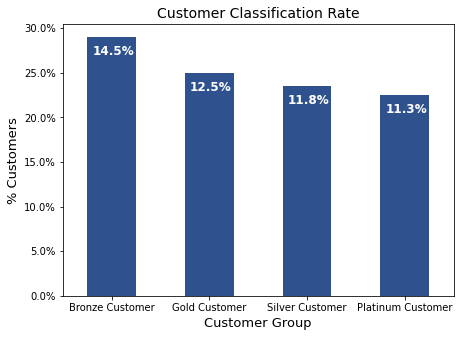

In [ ]:
ax = (rfm['Segment'].value_counts()*100.0 /len(rfm)).plot(kind='bar', stacked = True, rot = 0, color = '#2f528f', figsize = (7,5))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', fontsize = 13)
ax.set_xlabel('Customer Group', fontsize = 13)
ax.set_title('Customer Classification Rate', fontsize = 14)

totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.05, i.get_height()-2.0, \
            str(round((i.get_height()/total), 1))+'%', fontsize=12, color='white', weight = 'bold')

- We segment customers who have already had prior transactions into 4 groups: Platinum, Gold, Silver and Gold Customer.
- Platinum customers will drive the highest profit to the company, however, this group marks up the lowest percent.
- We will consider Platinum and Gold customers as potential customers to be targeted in the next marketing campaign and use this result to train model in the next part.

### 2. Model Development

#### Data preprosessing

In [ ]:
old_dataset = old_dataset.merge(rfm, how='left', on='customer_id')

In [ ]:
#create "target" column
def target(x):
    if (x == 'Platinum Customer') | (x == 'Gold Customer'):
        return 1
    else:
        return 0
old_dataset['target'] = old_dataset['Segment'].apply(lambda x: target(x))

In [ ]:
#drop some unneccessary columns
old_dataset.drop(['customer_id', 'recency', 'frequency', 'monetary', 'R', 'F', 'M', 'RFM Score', 'Segment',
                 'deceased_indicator', 'age_group', 'country', 'name', 'address'], inplace = True, axis = 1)
old_dataset.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,postcode,state,property_valuation,target
0,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,69,2016.0,NSW,10.0,1
1,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16,42,2153.0,NSW,10.0,0
2,Male,61,Recruiting Manager,Property,Mass Customer,Yes,15,68,NaN,NaN,NaN,0
3,Male,33,Recruiting Manager,IT,Mass Customer,No,7,61,4211.0,QLD,9.0,0
4,Female,56,Senior Editor,IT,Affluent Customer,Yes,8,45,2448.0,NSW,4.0,1


In [ ]:
#remove missing values
old_dataset.dropna(inplace=True)
old_dataset.reset_index(drop=True, inplace=True)

In [ ]:
#transform categorical variables into columns with numerical values by label encoding
le = LabelEncoder()
old_dataset['gender'] = le.fit_transform(old_dataset['gender'])
old_dataset['job_title'] = le.fit_transform(old_dataset['job_title'])
old_dataset['job_industry_category'] = le.fit_transform(old_dataset['job_industry_category'])
old_dataset['wealth_segment'] = le.fit_transform(old_dataset['wealth_segment'])
old_dataset['owns_car'] = le.fit_transform(old_dataset['owns_car'])
old_dataset['state'] = le.fit_transform(old_dataset['state'])
old_dataset

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,postcode,state,property_valuation,target
0,0,93,71,3,2,1,11,69,2016.0,0,10.0,1
1,1,81,19,2,2,1,16,42,2153.0,0,10.0,0
2,1,33,133,4,2,0,7,61,4211.0,1,9.0,0
3,0,56,149,4,0,1,8,45,2448.0,0,4.0,1
4,1,35,149,7,1,1,13,56,3216.0,2,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3901,1,93,168,5,2,1,14,47,2088.0,0,12.0,0
3902,0,8,184,3,2,0,19,47,3977.0,2,6.0,0
3903,0,87,170,5,1,1,1,21,2350.0,0,2.0,0
3904,1,11,170,5,0,1,10,49,3064.0,2,3.0,0


In [ ]:
#check data skewness
target_1 = old_dataset[old_dataset["target"] == 1]
target_0  = old_dataset[old_dataset["target"] == 0]
print(target_1.shape)
print(target_0.shape)

(1610, 12)
(2296, 12)


In [ ]:
X = old_dataset.drop('target', axis=1)
Y = old_dataset['target']

In [ ]:
#splitting the original dataset into the Training set and Test set
original_X_train, original_X_test, original_Y_train, original_Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, stratify = Y)

In [ ]:
#random undersampling
# Lets shuffle the data before creating the subsamples
old_dataset = old_dataset.sample(frac=1)

# amount of fraud classes 1610 rows.
target_1 = old_dataset.loc[old_dataset['target'] == 1]
target_0 = old_dataset.loc[old_dataset['target'] == 0][:1610]

normal_distributed_df = pd.concat([target_1, target_0])

# Shuffle dataframe rows
old_df = normal_distributed_df.sample(frac=1, random_state=1)

old_df['target'].value_counts()

1    1610
0    1610
Name: target, dtype: int64

In [ ]:
#splitting the undersampled dataset into the Training set and Test set
X_under = old_df.drop('target', axis=1)
Y_under = old_df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)

#### 2.1. Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(class_weight = 'balanced', random_state =22)

rf.fit(X_train, Y_train)

rf_Y_pred = rf.predict(original_X_test)
rf_Y_proba = rf.predict_proba(original_X_test)

In [ ]:
print(classification_report(original_Y_test, rf_Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       460
           1       0.76      0.91      0.83       322

    accuracy                           0.84       782
   macro avg       0.84      0.85      0.84       782
weighted avg       0.86      0.84      0.84       782



#### 2.2. Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(random_state =22)

dt.fit(X_train, Y_train)

dt_Y_pred = dt.predict(original_X_test)
dt_Y_proba = dt.predict_proba(original_X_test)

In [ ]:
print(classification_report(original_Y_test, dt_Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       460
           1       0.74      0.92      0.82       322

    accuracy                           0.83       782
   macro avg       0.83      0.85      0.83       782
weighted avg       0.85      0.83      0.83       782



#### 2.3. Model Tuning

#### Random Forest Tuned

In [ ]:
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)
RF_tuned = RandomForestClassifier()
grid_RF_params = {'bootstrap': [True],
                  'max_depth': [80, 90, 100, 110],
                  'max_features': [2, 3],
                  'min_samples_leaf': [3, 4, 5],
                  'min_samples_split': [8, 10, 12],
                  'n_estimators': [100, 200, 300, 1000],}

grid_RF_cv = GridSearchCV(RF_tuned, grid_RF_params, scoring = 'f1', refit = True, cv=CV, verbose=1)  
grid_RF_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='f1', verbose=1)

In [ ]:
best_RF = grid_RF_cv.best_estimator_
best_RF.fit(X_train, Y_train)
best_rf_Y_pred = best_RF.predict(original_X_test)
best_rf_Y_proba = best_RF.predict_proba(original_X_test)

In [ ]:
print(classification_report(original_Y_test, best_rf_Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       460
           1       0.75      0.90      0.82       322

    accuracy                           0.84       782
   macro avg       0.84      0.85      0.84       782
weighted avg       0.85      0.84      0.84       782



#### Decision Tree Tuned

In [ ]:
DT_tuned = DecisionTreeClassifier()
grid_DT_params = {'criterion': ['gini', 'entropy', 'log_loss'], 
                  'splitter' : ['best', 'random'], 
                  'max_depth' : [1,3,5,7,9,11,12],
                  'min_samples_leaf' :[1,2,3,4,5,6,7,8,9,10],
                  'max_features' : ['auto', 'sqrt', 'log2', None],}

grid_DT_cv = GridSearchCV(DT_tuned, grid_DT_params, scoring = 'f1', refit = True, cv=CV, verbose=1)  
grid_DT_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=1)

In [ ]:
best_DT = grid_DT_cv.best_estimator_
best_DT.fit(X_train, Y_train)
best_dt_Y_pred = best_DT.predict(original_X_test)
best_dt_Y_proba = best_DT.predict_proba(original_X_test)

In [ ]:
print(classification_report(original_Y_test, best_dt_Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55       460
           1       0.43      0.52      0.47       322

    accuracy                           0.52       782
   macro avg       0.52      0.52      0.51       782
weighted avg       0.53      0.52      0.52       782



### 3. Interpretation 

#### 3.1. Prepare NewCustomerList data

In [ ]:
NewCustomerList.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,name,age,age_group
0,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,Chickie Brister,65,The Elderly
1,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,Morly Genery,52,Middle-Aged People
2,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,Ardelis Forrester,48,Middle-Aged People
3,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,Lucine Stutt,43,Middle-Aged People
4,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,Melinda Hadlee,57,Middle-Aged People


In [ ]:
#drop some unneccessary columns
new_df = NewCustomerList.drop(['deceased_indicator', 'age_group', 'country', 'name', 'address', 'Rank', 'Value'], axis = 1)

In [ ]:
#transform categorical variables into columns with numerical values by label encoding
le = LabelEncoder()
new_df['gender'] = le.fit_transform(new_df['gender'])
new_df['job_title'] = le.fit_transform(new_df['job_title'])
new_df['job_industry_category'] = le.fit_transform(new_df['job_industry_category'])
new_df['wealth_segment'] = le.fit_transform(new_df['wealth_segment'])
new_df['owns_car'] = le.fit_transform(new_df['owns_car'])
new_df['state'] = le.fit_transform(new_df['state'])
new_df

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,age
0,1,86,71,5,2,1,14,4500,1,6,65
1,1,69,165,6,2,0,16,2113,0,11,52
2,0,10,139,2,0,0,10,3505,2,5,48
3,0,64,4,5,0,1,5,4814,1,1,43
4,0,34,68,2,0,0,19,2093,0,9,57
...,...,...,...,...,...,...,...,...,...,...,...
978,1,60,108,2,0,0,9,2200,0,7,63
979,1,22,144,3,2,0,6,2196,0,10,21
980,0,17,32,2,0,1,15,4702,1,2,68
981,1,30,67,2,2,1,19,4215,1,2,70


#### 3.2. Fit 1000 new customers data in to best model 

In [ ]:
target_new = rf.predict(new_df)

In [ ]:
target_proba = []
for x in rf.predict_proba(new_df):
     target_proba.append(x[1])

In [ ]:
target_new = pd.DataFrame(target_new, columns = ['target'])
NewCustomerList['target'] = target_new['target']
NewCustomerList['target_proba'] = target_proba
NewCustomerList.sort_values(by = 'target_proba', ascending=False).head(5)

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,name,age,age_group,target,target_proba
207,Female,12,Social Worker,Health,High Net Worth,N,No,19,06 Old Gate Park,2144,NSW,Australia,9,206,1.137500,Jenelle Fearnill,64,The Elderly,1,0.70
59,Male,47,Cost Accountant,Financial Services,High Net Worth,N,Yes,17,06936 Bobwhite Circle,2257,NSW,Australia,7,57,1.375000,Lorrie Antonelli,39,Adults,1,0.70
746,Male,69,Health Coach III,Health,High Net Worth,N,No,17,7870 Stuart Crossing,2090,NSW,Australia,7,755,0.640000,Meade Bampton,40,Middle-Aged People,1,0.69
4,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,Melinda Hadlee,57,Middle-Aged People,1,0.69
458,Male,42,Business Systems Development Analyst,Financial Services,Mass Customer,N,No,19,6218 Delladonna Parkway,4115,QLD,Australia,8,466,0.890000,Thorn Stigers,50,Middle-Aged People,1,0.68
